In [7]:
using LinearAlgebra
using Plots

In [12]:
# Define the ICMF struct
struct ICMF
    W::Vector{Float64}  # Filter coefficients vector
    μ::Float64          # Step size
    filter_length::Int  # Length of the filter
end

# Define the initialization function for the ICMF
function initialize(filter_length::Int, μ::Float64) :: ICMF
    W = zeros(filter_length)  # Initialize filter coefficients to zero
    return ICMF(W, μ, filter_length)
end

# Define the LMS update function as a method within the ICMF struct
function update!(icmf::ICMF, x::Vector{Float64}, d::Float64)
    # Estimate the output using the current filter coefficients
    y = dot(icmf.W, x)
    
    # Calculate the error
    e = d - y
    
    # Update the filter coefficients
    icmf.W .+= 2 * icmf.μ * e * x
    
    return e
end

update! (generic function with 1 method)

Iteration 10, Error: 0.8834605097301812
Iteration 20, Error: 0.83183615650289
Iteration 30, Error: 0.7421553042937183
Iteration 40, Error: -0.9332639244955645
Iteration 50, Error: -0.6904815649451912
Iteration 60, Error: -0.44004657300053107
Iteration 70, Error: 1.1562541011246397
Iteration 80, Error: 0.8969602200130964
Iteration 90, Error: -0.20098623387485198
Iteration 100, Error: -0.7527759267455598
Final filter coefficients:
[-0.09842971849398485, -0.04955566777952081, -0.05743424757089856, 0.3346930368314715]


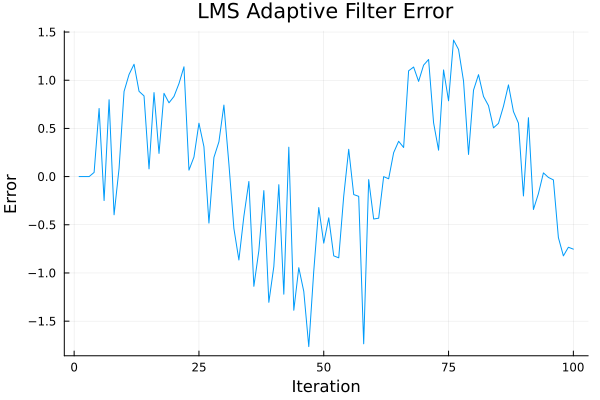

In [13]:
# Simulation parameters
filter_length = 4    # Length of the filter
n_iterations = 100   # Number of adaptive iterations
μ = 0.01             # Step size for LMS algorithm

# Generate a sample desired signal (clean signal)
desired_signal = sin.(0.1 * (1:n_iterations))

# Generate interference
interference = 0.5 * randn(n_iterations)

# Create the primary signal (desired signal + interference)
primary_signal = desired_signal .+ interference

# Create a reference signal that contains only the interference
reference_signal = interference

# Initialize the ICMF structure using the initialization function
icmf = initialize(filter_length, μ)

# Adaptive filtering using the LMS algorithm
errors = zeros(n_iterations)
for n in filter_length:n_iterations
    # Extract the current input sample segment from the reference signal
    x = reference_signal[n-filter_length+1:n]
    
    # Current primary signal segment
    d = primary_signal[n]
    
    # Update the filter coefficients using the LMS algorithm
    e = update!(icmf, x, d)
    
    # Store the error for analysis
    errors[n] = e
    
    # Optionally print the error every few iterations
    if n % 10 == 0
        println("Iteration $n, Error: $e")
    end
end

# Final filter coefficients
println("Final filter coefficients:")
println(icmf.W)

# Plot the results
plot(errors, title="LMS Adaptive Filter Error", xlabel="Iteration", ylabel="Error", legend=false)
